In [43]:
import seaborn as sns
import plotnine as p9
import polars as pl
import polars.selectors as cs
import matplotlib.pyplot as plt

In [44]:
(bodyfat := pl.read_csv("data/bodyfat.csv"))

shape: (252, 15)
┌─────────┬─────────┬─────┬────────┬───┬───────┬────────┬─────────┬───────┐
│ density ┆ bodyfat ┆ age ┆ weight ┆ … ┆ ankle ┆ biceps ┆ forearm ┆ wrist │
│ ---     ┆ ---     ┆ --- ┆ ---    ┆   ┆ ---   ┆ ---    ┆ ---     ┆ ---   │
│ f64     ┆ f64     ┆ i64 ┆ f64    ┆   ┆ f64   ┆ f64    ┆ f64     ┆ f64   │
╞═════════╪═════════╪═════╪════════╪═══╪═══════╪════════╪═════════╪═══════╡
│ 1.0708  ┆ 12.3    ┆ 23  ┆ 154.25 ┆ … ┆ 21.9  ┆ 32.0   ┆ 27.4    ┆ 17.1  │
│ 1.0853  ┆ 6.1     ┆ 22  ┆ 173.25 ┆ … ┆ 23.4  ┆ 30.5   ┆ 28.9    ┆ 18.2  │
│ 1.0414  ┆ 25.3    ┆ 22  ┆ 154.0  ┆ … ┆ 24.0  ┆ 28.8   ┆ 25.2    ┆ 16.6  │
│ 1.0751  ┆ 10.4    ┆ 26  ┆ 184.75 ┆ … ┆ 22.8  ┆ 32.4   ┆ 29.4    ┆ 18.2  │
│ 1.034   ┆ 28.7    ┆ 24  ┆ 184.25 ┆ … ┆ 24.0  ┆ 32.2   ┆ 27.7    ┆ 17.7  │
│ …       ┆ …       ┆ …   ┆ …      ┆ … ┆ …     ┆ …      ┆ …       ┆ …     │
│ 1.0736  ┆ 11.0    ┆ 70  ┆ 134.25 ┆ … ┆ 21.5  ┆ 25.6   ┆ 25.7    ┆ 18.5  │
│ 1.0236  ┆ 33.6    ┆ 72  ┆ 201.0  ┆ … ┆ 23.2  ┆ 35.2   ┆ 28.6    ┆ 20.1  │
│ 1.0328  ┆ 29.3    ┆ 72  ┆ 186.75 ┆ … ┆ 21.5  ┆ 31.3   ┆ 27.2    ┆ 18.0  │
│ 1.0399  ┆ 26.0    ┆ 72  ┆ 190.75 ┆ … ┆ 22.7  ┆ 30.5   ┆ 29.4    ┆ 19.8  │
│ 1.0271  ┆ 31.9    ┆ 74  ┆ 207.5  ┆ … ┆ 24.6  ┆ 33.7   ┆ 30.0    ┆ 20.9  │
└─────────┴─────────┴─────┴────────┴───┴───────┴────────┴─────────┴───────┘

In [49]:
(cat_predictors :=
 bodyfat
 .select(cs.by_name('bodyfat') | cs.numeric()) 
 .unpivot(cs.numeric(),    
          index = 'bodyfat',
          variable_name = 'predictor',
          value_name = 'label')
 .to_pandas()
)

bodyfat predictor    label
0        12.3   density   1.0708
1         6.1   density   1.0853
2        25.3   density   1.0414
3        10.4   density   1.0751
4        28.7   density   1.0340
...       ...       ...      ...
3775     11.0     wrist  18.5000
3776     33.6     wrist  20.1000
3777     29.3     wrist  18.0000
3778     26.0     wrist  19.8000
3779     31.9     wrist  20.9000

[3780 rows x 3 columns]

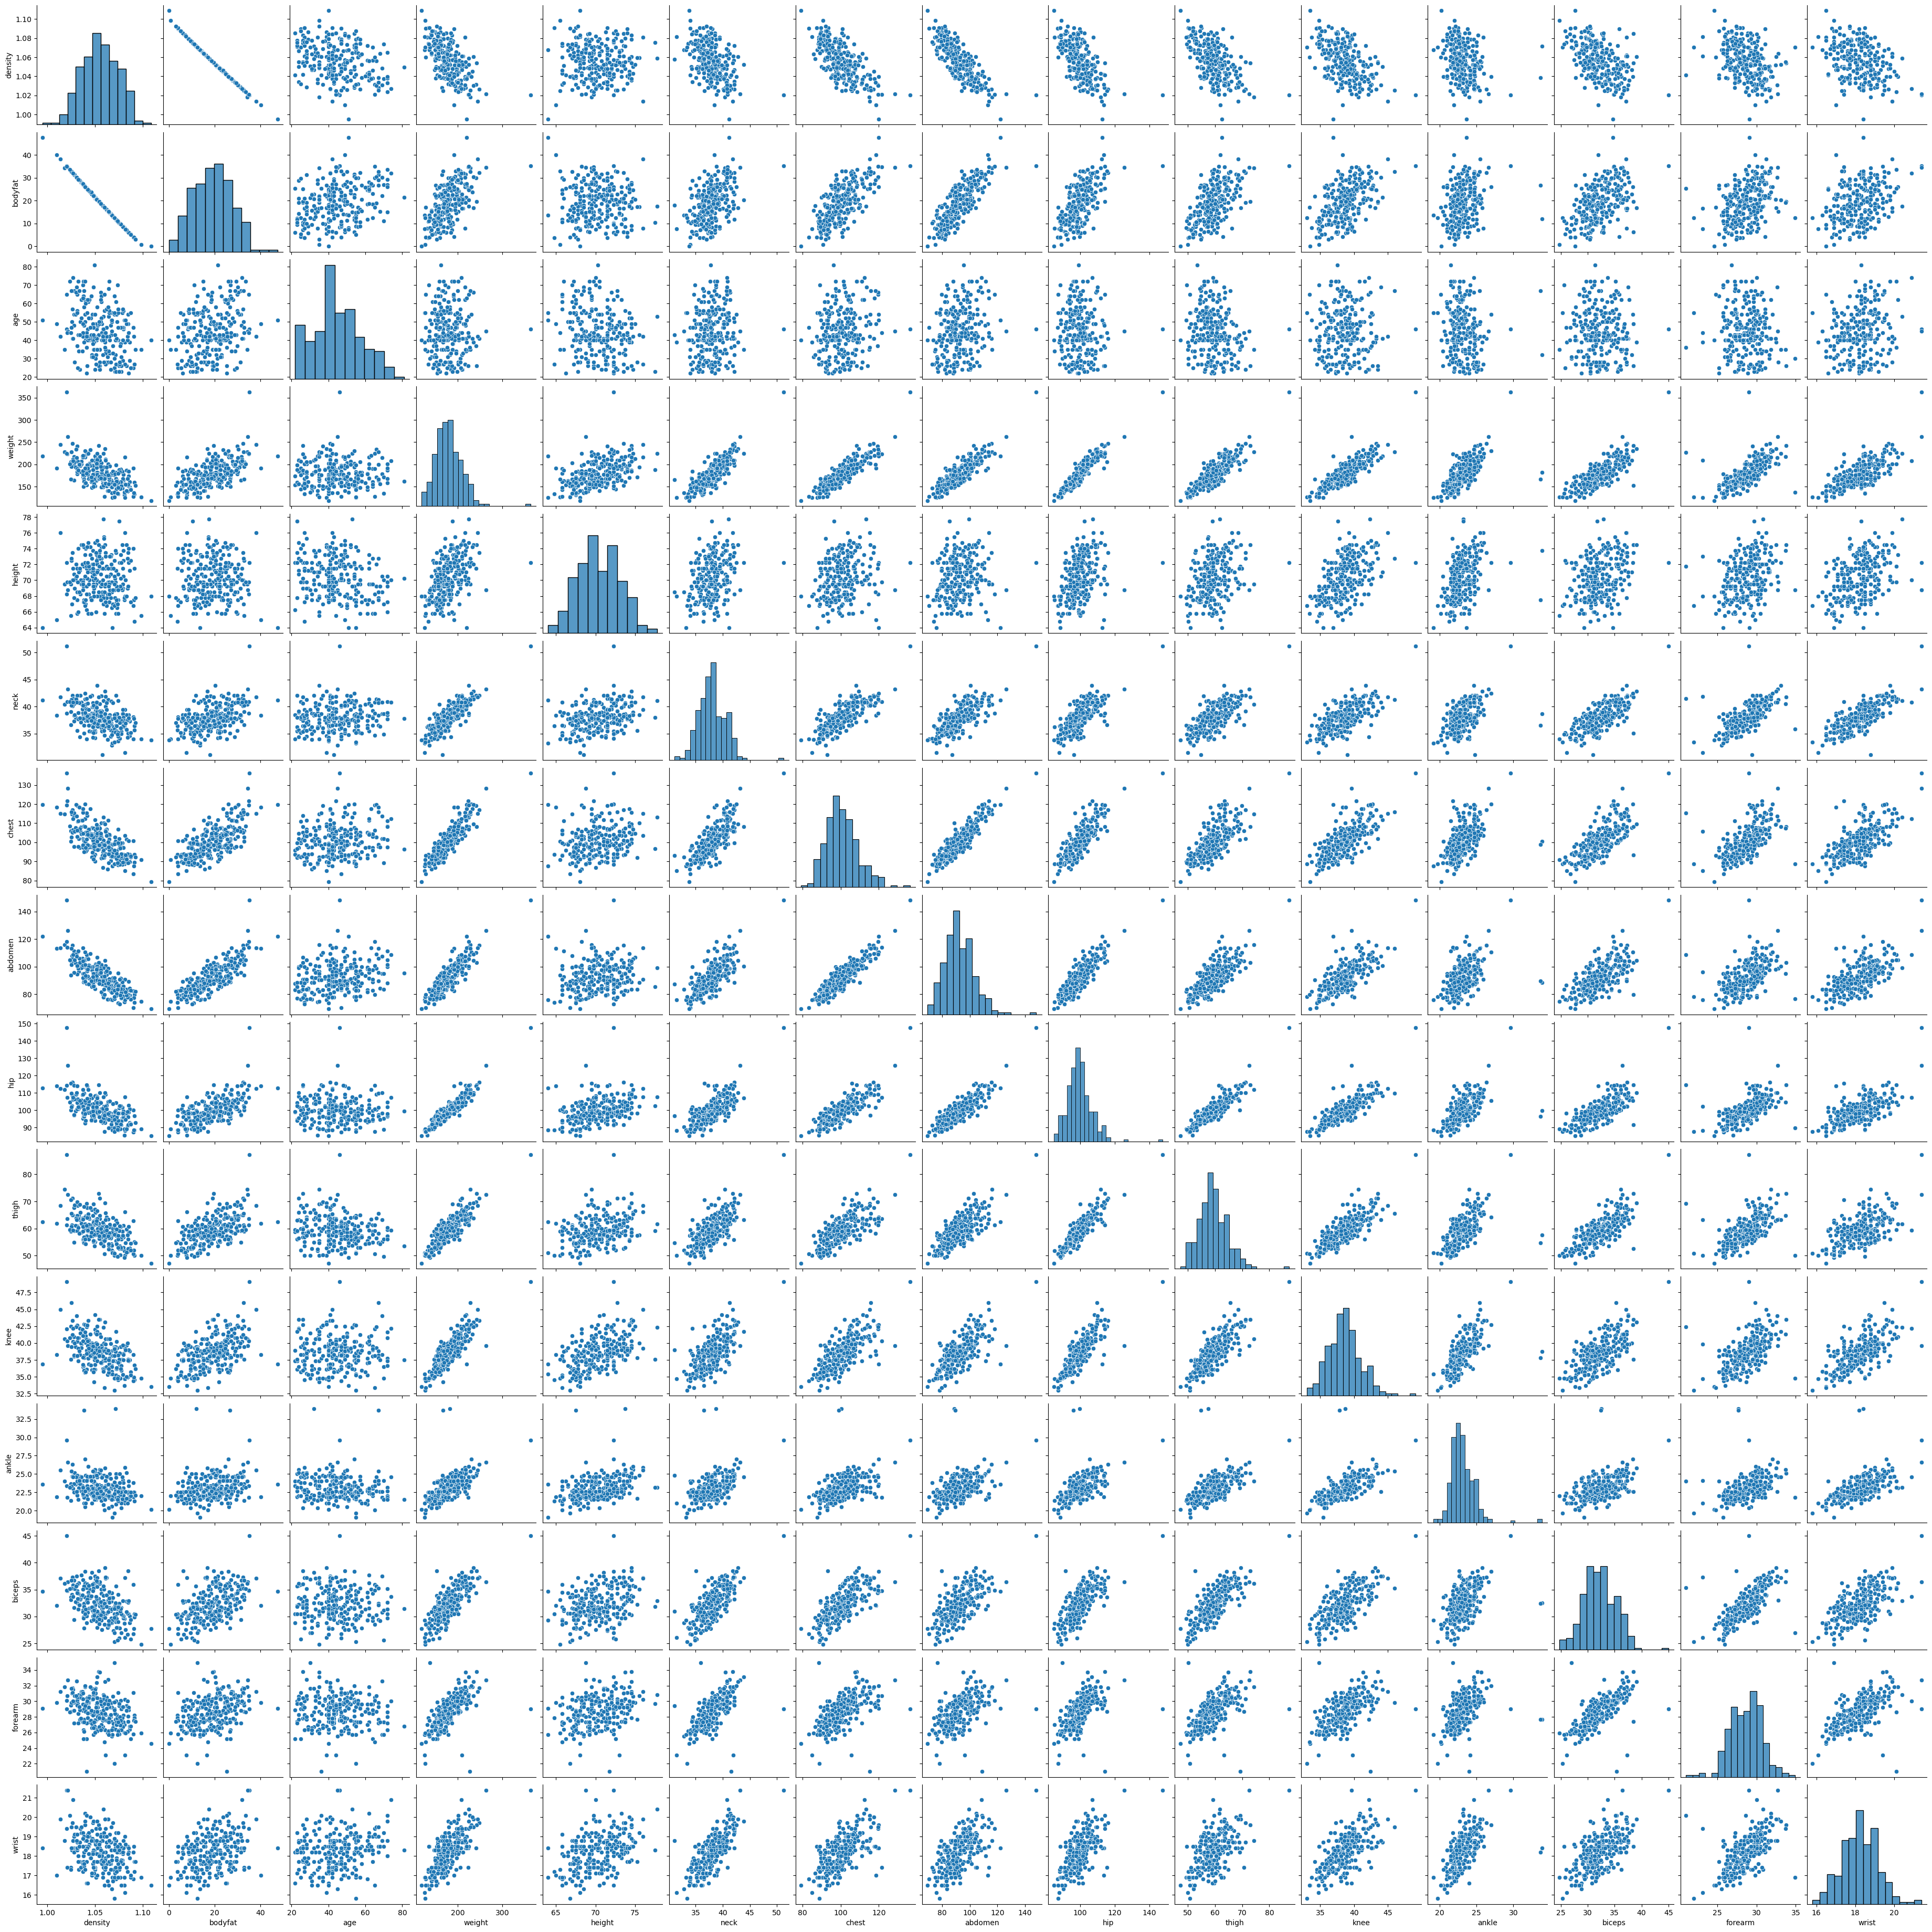

In [52]:
(sns.pairplot(data=bodyfat.to_pandas())
)
plt.show()

**SUMMARY:**
The pairplots show strong positive linear relationships among many body circumference measurements and between these measurements and body fat percentage, especially for abdomen, chest, weight, and hip. The diagonal histograms show mostly unimodal distributions with moderate variability, while the scatterplots show substantial correlation between predictors and generally linear associations across variable pairs.

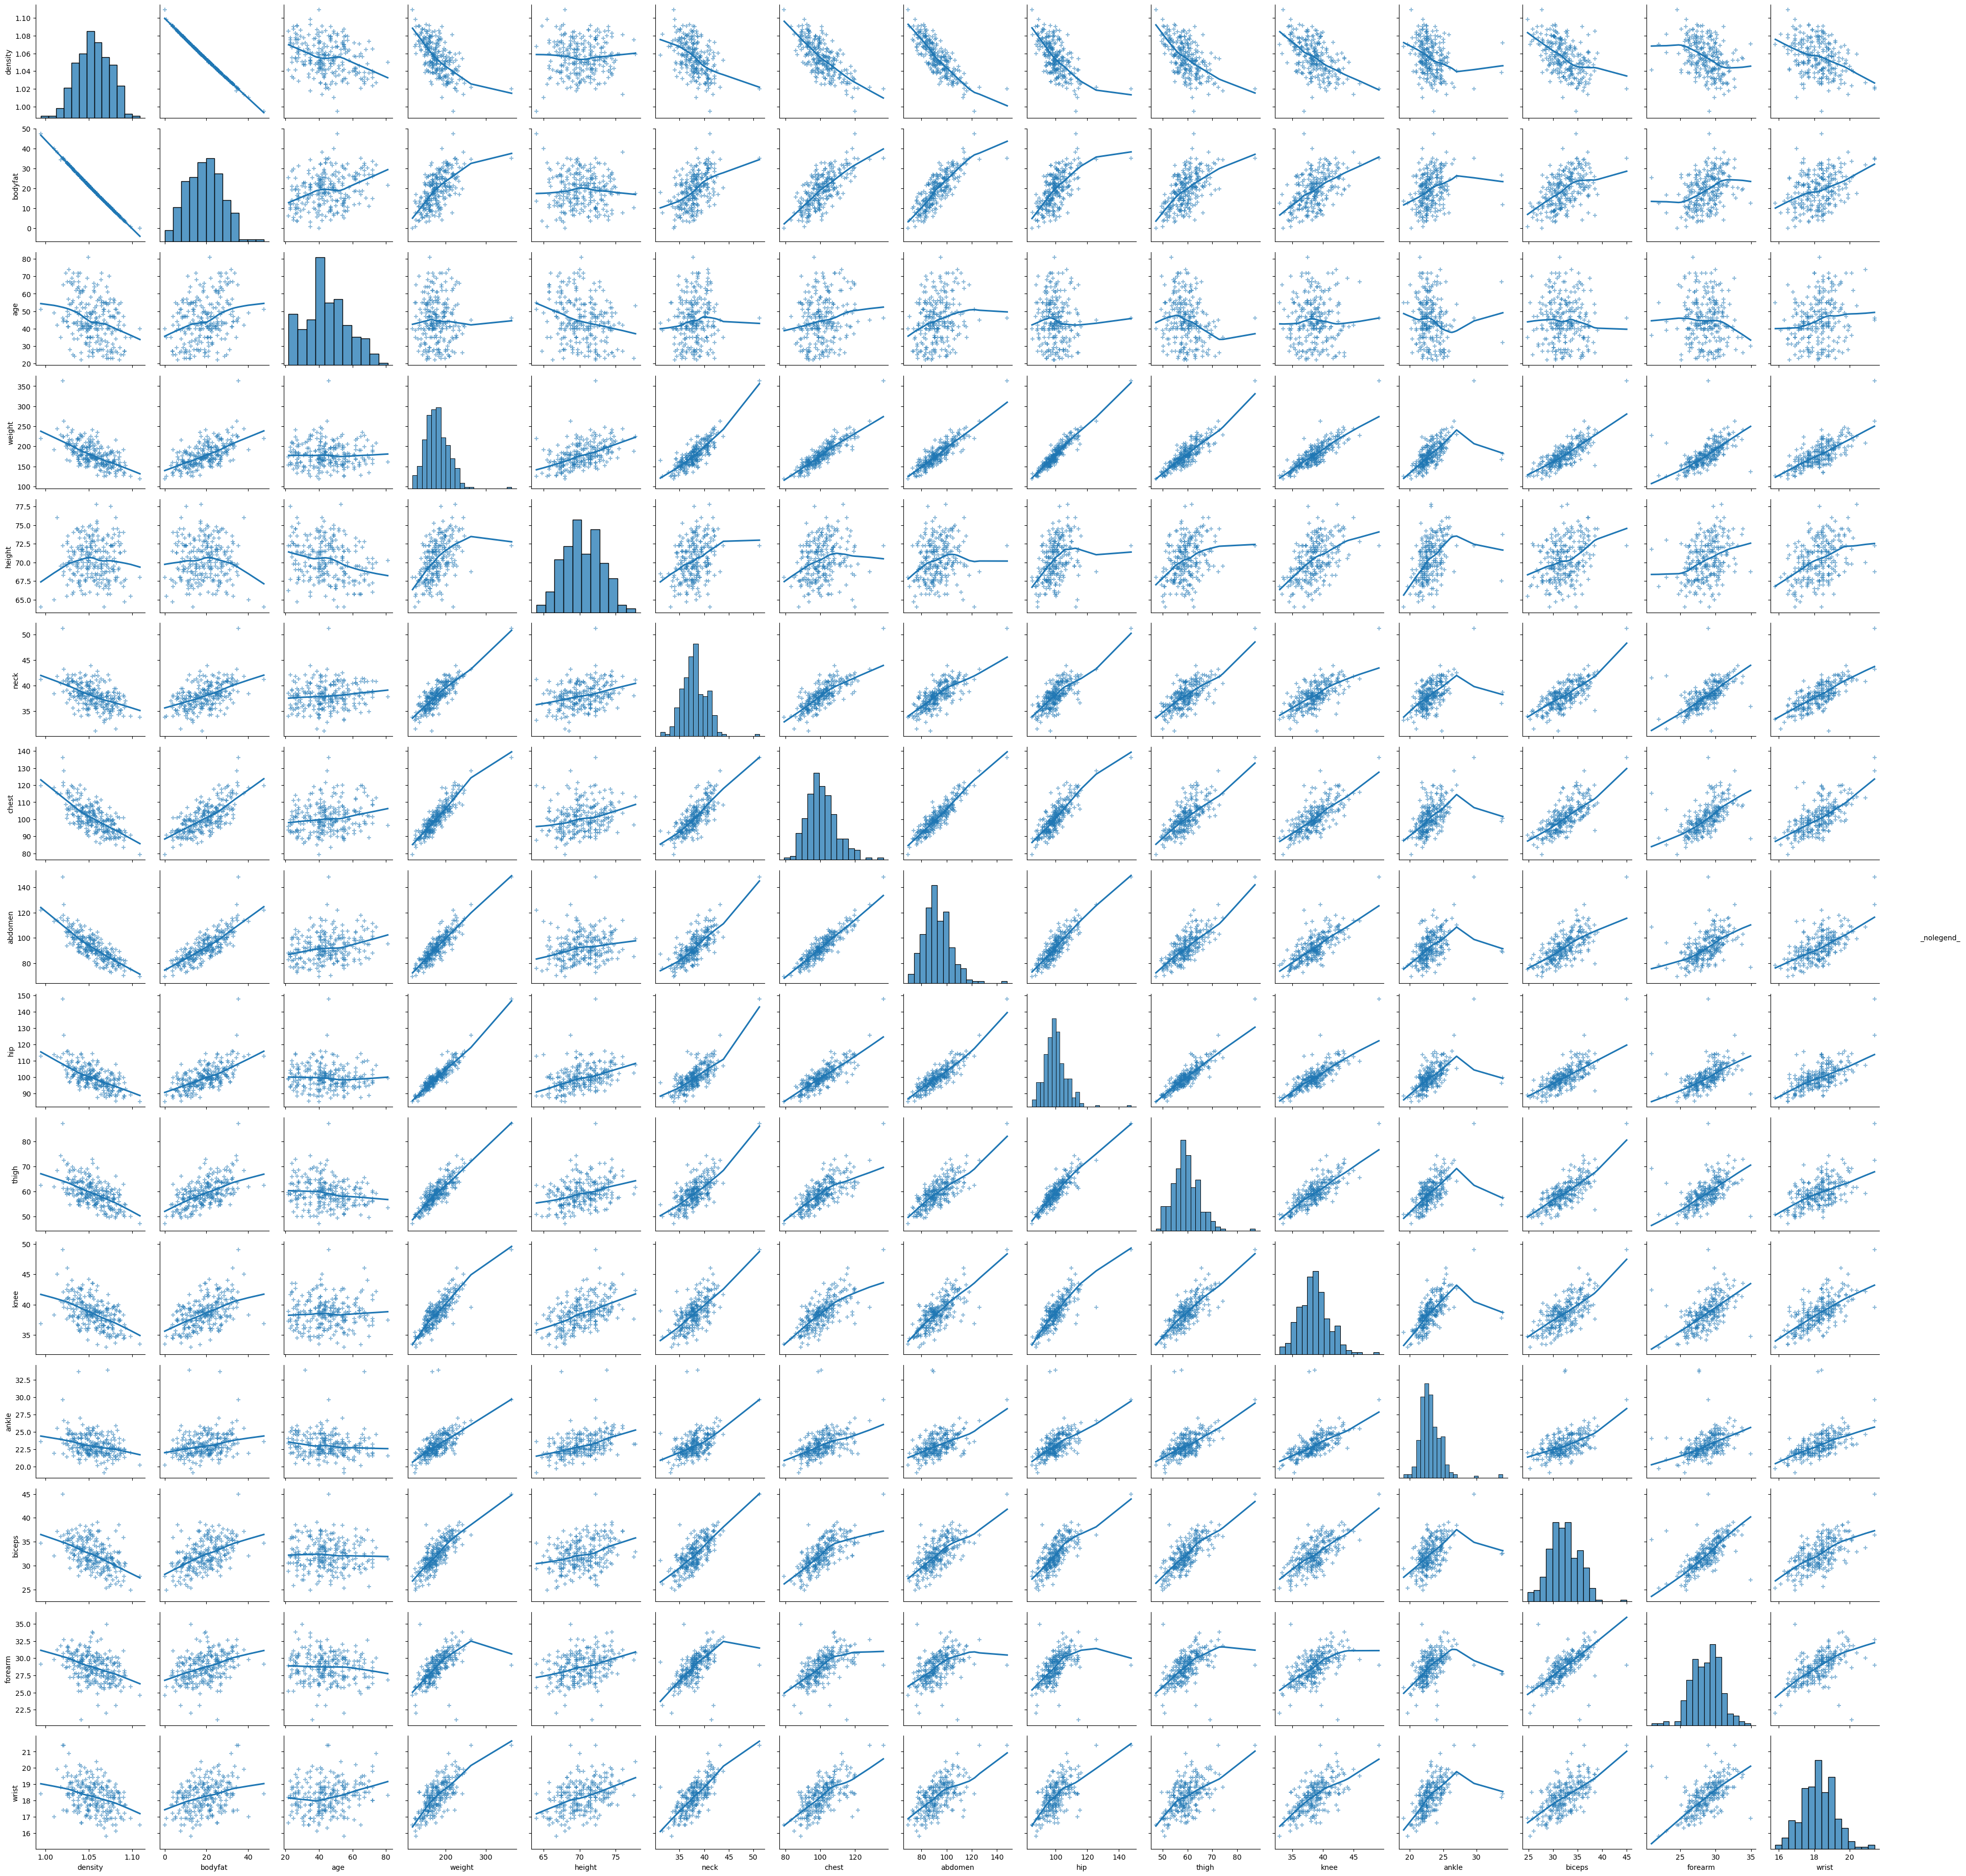

In [53]:
g = sns.PairGrid(data=bodyfat.to_pandas())
g.map_diag(sns.histplot)
g.map_offdiag(sns.regplot,
              lowess=True,
              marker="+",
              scatter_kws={'alpha': 0.5}
              )
g.add_legend()
plt.show()

**Summary:**
The smoothed PairGrid confirms the strong relationships observed in the pairplot and further reveals the shape of these associations. Most variable pairs show smooth increasing trends, while a few show mild curvature, which means there are potentional nonlinear relationships. The smoothed trends clarify overall patterns by reducing noise and highlighting abdomen, weight, and chest as variables most strongly associated with body fat percentage.